Stephanie Chiang  
DATA 620 Summer 2025  
### Project 1:
# Centrality Measures

## Introduction

To analyze and compare centrality measures across nodes, I have chosen to use a network dataset from [Kaggle](https://www.kaggle.com/datasets/sanketrai/twitter-mbti-dataset) that contains a subset of Twitter users who have self-reported their MBTI personality types. The nodes represent Twitter users, each including information like an ID and their account name, as well as their MBTI type. This is a categorical variable with 16 possible levels. The edges represent follower relationships between users.

This analysis is planned to proceed as follows:
1. Import and load the data: There are two CSV files of value here, one containing the user relationships (`edges.csv`) and the other containing node ID and MBTI label (`mbti_labels.csv`).
2. Data cleaning and preparation: Check the data for missing values or duplicates and ensure that the data is in a suitable format for use with NetworkX.
3. Network construction: Use NetworkX to create the graph where nodes represent Twitter users and edges represent follower relationships.
4. Centrality Measures : Calculate the degree centrality for each node using NetworkX's `degree_centrality()` function. This will give us a measure of how connected each user is in the network, allowing for ranking or comparison between groups.
5. Visualization: Use NetworkX and Matplotlib to visualize the degree centrality distributions across different MBTI types, which can help show if there is a relationship between personality type and social connectivity.

**Hypothetical outcome**:

This would allow us to explore the relationship between personality types and social connectivity on Twitter, and provide insights into how different personality traits may influence online interactions and relationships. For example, we might find that users with certain MBTI types (e.g., extroverted types like ENFP or ESFJ) have higher degree centrality, indicating they are more connected and have more followers compared to introverted types (e.g., ISTJ or INTJ). This could suggest that extroverted individuals are more active in building social networks on Twitter, while introverted individuals may prefer to maintain smaller, more intimate connections.


### Data Preparation

First, a graph object is contructed in Networkx using data of follower-followee relationships. Then, the MBTI attributes for each node are read in and added to the graph object.

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Read edges from CSV file
df = pd.read_csv('tw_edges.csv')
G = nx.from_pandas_edgelist(df, source='follower_id', target='followee_id')
print(G)

# Read node attributes from CSV file
nodes_df = pd.read_csv('mbti_labels.csv', header=0)

# Add node attributes to the graph
for row in nodes_df.itertuples():
    node_id = row[1]
    attributes = {'mbti': row[2]}
    G.add_node(node_id, **attributes)

# Print first 5 nodes with their attributes
print(list(G.nodes(data=True))[:5])

Graph with 6067 nodes and 24738 edges
[(5660312, {'mbti': 'enfp'}), (1654576440, {'mbti': 'intj'}), (3387707473, {'mbti': 'infj'}), (3020047310, {'mbti': 'intj'}), (782987339425603584, {'mbti': 'infp'})]


### Degree Centrality

Degree centrality can be calculated for each node using NetworkX's `degree_centrality()` function. This indicates how many connections each node has, which can be interpreted as a measure of influence or importance within the network.

The average degree centrality is then calculated for each MBTI category, to enable comparison between different personality types. We can use this to identify which personality types tend to have more connections and influence.

[(1380361633, 0.08130178935991354), (103846480, 0.033265281614026664), (740687389, 0.0307433649573676), (320306110, 0.02353788879548457), (1057596327515828225, 0.021015972138825507)]


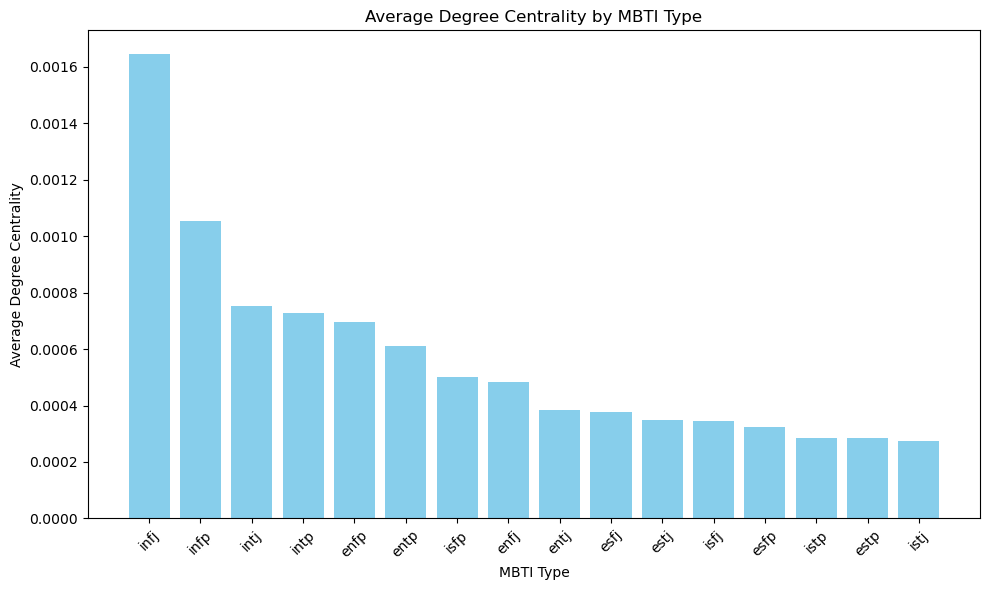

In [27]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Print the top 5 nodes by degree centrality
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_degree_centrality)

# Compare degree dentrality accross different MBTI types
mbti_degree_centrality = {}
for node, attrs in G.nodes(data=True):
    mbti_type = attrs.get('mbti')
    if mbti_type not in mbti_degree_centrality:
        mbti_degree_centrality[mbti_type] = []
    mbti_degree_centrality[mbti_type].append(degree_centrality[node])

# Calculate average degree centrality for each MBTI type
mbti_avg_degree_centrality = {mbti: sum(degrees) / len(degrees) for mbti, degrees in mbti_degree_centrality.items()}

# Sort the MBTI types by average degree centrality
mbti_avg_degree_centrality = dict(sorted(mbti_avg_degree_centrality.items(), key=lambda x: x[1], reverse=True))

# Plot bar chart for average degree centrality by MBTI type
plt.figure(figsize=(10, 6))
plt.bar(mbti_avg_degree_centrality.keys(), mbti_avg_degree_centrality.values(), color='skyblue')
plt.xlabel('MBTI Type')
plt.ylabel('Average Degree Centrality')
plt.title('Average Degree Centrality by MBTI Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Unexpectedly, the results show that the average degree centrality is highest for the INFJ personality type, and the top 4 types by centrality are all introverted. This suggests that extraversion may have a less significant influence in the Twitter network.

### Eigenvector Centrality

Eigenvector centrality is another measure of importance that also looks at the number of connections a node has, but also the quality and influence of those connections. I am using NetworkX's `eigenvector_centrality()` function.

Again, the average eigenvector centrality is also calculated for each MBTI type, for comparison of node influence in the network.

[(1380361633, 0.1946270821768516), (740687389, 0.1907804081366295), (816581889943158786, 0.15852808630362722), (1043334018, 0.13755091693984367), (1012892486077960193, 0.13525232249285135)]


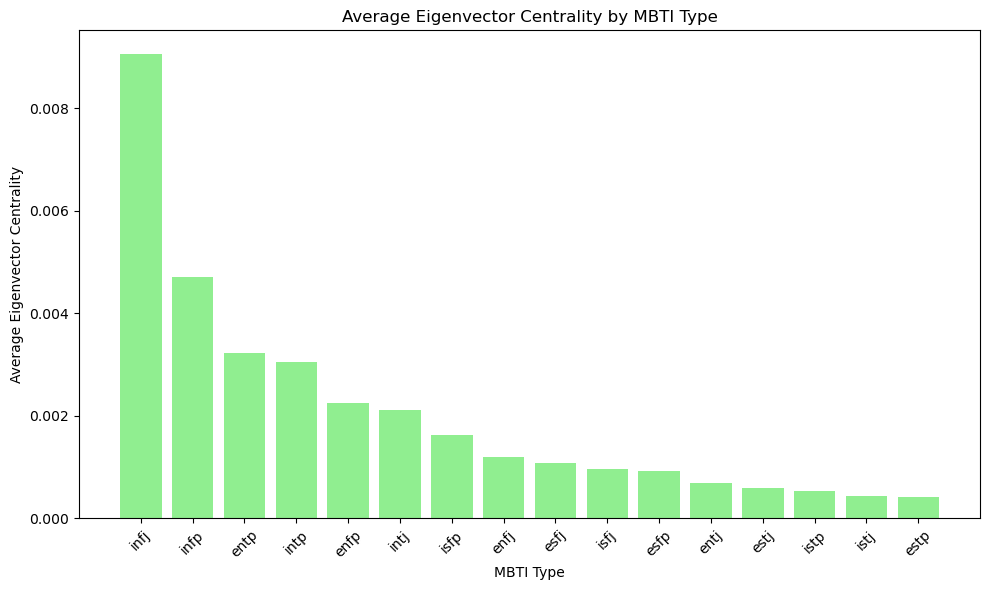

In [28]:

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print the top 5 nodes by eigenvector centrality
top_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_eigenvector_centrality)

# Compare eigenvector centrality across different MBTI types
mbti_eigenvector_centrality = {}
for node, attrs in G.nodes(data=True):
    mbti_type = attrs.get('mbti')
    if mbti_type not in mbti_eigenvector_centrality:
        mbti_eigenvector_centrality[mbti_type] = []
    mbti_eigenvector_centrality[mbti_type].append(eigenvector_centrality[node])

# Calculate average eigenvector centrality for each MBTI type
mbti_avg_eigenvector_centrality = {mbti: sum(degrees) / len(degrees) for mbti, degrees in mbti_eigenvector_centrality.items()}

# Sort the MBTI types by average eigenvector centrality
mbti_avg_eigenvector_centrality = dict(sorted(mbti_avg_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True))

# Plot bar chart for average eigenvector centrality by MBTI type
plt.figure(figsize=(10, 6))
plt.bar(mbti_avg_eigenvector_centrality.keys(), mbti_avg_eigenvector_centrality.values(), color='lightgreen')
plt.xlabel('MBTI Type')
plt.ylabel('Average Eigenvector Centrality')
plt.title('Average Eigenvector Centrality by MBTI Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Again, the results show that the INFJ type has the highest average eigenvector centrality, followed by INFP, though after that, more extroverted types appear than before. This suggests that these introverted types not only have many connections but also are connected to other influential nodes in the network, indicating a strong position within the social structure.